Actions to Perform:

Use pandas to read data as a dataframe.

Check the data. There should be no missing values.

Convert the diagnosis column to 1/0 and store in a new column target.

Store the encoded column in dataframe and drop the diagnosis column for simplicity.

Scale the data so that each feature has a single unit variance.

Transform this data to its first 2 principal components.

Plot the two dimensions.

Print the explained variance.

Try the same with 3 principal components.

Check the accuracy for 2nd and 3rd components.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [25]:
ct= pd.read_csv("C:\\Users\\shiva\\Downloads\\1566805294_lesson_5_project\\breast-cancer-data.csv")
ct

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Check the data. There should be no missing values.

In [26]:
ct.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Convert the diagnosis column to 1/0 and store in a new column target.


#### M -- 1
#### B -- 0

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le= LabelEncoder()
td = ct['diagnosis']
td= le.fit_transform(td)


### Store the encoded column in dataframe and drop the diagnosis column for simplicity.

In [29]:
ct.drop(['diagnosis'], axis= 1, inplace= True)

In [30]:
ct.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scale the data so that each feature has a single unit variance.
### Transform this data to its first 2 principal components.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss= StandardScaler()
ss.fit(ct)

StandardScaler()

In [33]:
scaled_data= ss.transform(ct)

In [34]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)

In [35]:
pca.fit(scaled_data)

PCA(n_components=2)

In [36]:
pca_data= pca.transform(scaled_data)

In [37]:
print(scaled_data.shape)
print(pca_data.shape)

(569, 31)
(569, 2)


### Plot the two dimensions.

Text(0, 0.5, 'Second Principal Component')

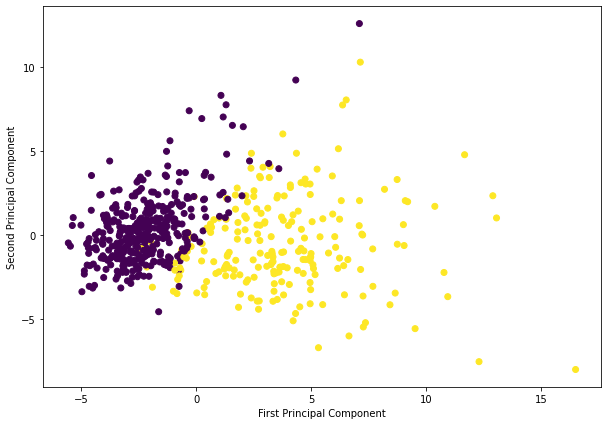

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(pca_data[:,0],pca_data[:,1],c=td,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Print the explained variance.


In [40]:
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

In [41]:
pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

### Try the same with 3 principal components.

In [42]:
pca_3= PCA(n_components= 3)
pca_3.fit(scaled_data)

PCA(n_components=3)

In [43]:
pca_3_data= pca_3.transform(scaled_data)

In [44]:
print(scaled_data.shape)
print(pca_3_data.shape)

(569, 31)
(569, 3)


In [45]:
pca_3.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436])

### Check the accuracy for 2nd and 3rd components.

In [48]:
from sklearn.model_selection import train_test_split


In [68]:
x_train, x_test, y_train, y_test= train_test_split(ct, td, test_size= 0.3, random_state= 1)

In [69]:
x_train= ss.transform(x_train)
x_test= ss.transform(x_test)

In [70]:
x_train= pca.transform(x_train)
x_test= pca.transform(x_test)

In [75]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [76]:
lr.fit(x_train, y_train)

LogisticRegression()

In [77]:
lr.score(x_test, y_test)

0.9415204678362573

In [78]:
train_data, test_data, train_output, test_output = train_test_split( ct, td, test_size=0.3, random_state=1)
train_data = ss.transform(train_data)
test_data = ss.transform(test_data)

train_data = pca_3.transform(train_data)
test_data = pca_3.transform(test_data)
lr = LogisticRegression()

lr.fit(train_data, train_output)
lr.score(test_data, test_output)

0.9298245614035088